In [1]:
import os
import shutil


original_dataset_dir = '/kaggle/input/leapgestrecog/leapGestRecog'

processed_dir = '/kaggle/working/leapgestrecog_processed'


max_images_per_class = 1000 

if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

print(f"Reorganizing files and creating a subset of {max_images_per_class} images per class...")


for subject_folder in os.listdir(original_dataset_dir):
    subject_path = os.path.join(original_dataset_dir, subject_folder)
    
    if os.path.isdir(subject_path):
        
        for gesture_folder in os.listdir(subject_path):
            gesture_path = os.path.join(subject_path, gesture_folder)
            
           
            dst_class_dir = os.path.join(processed_dir, gesture_folder)
            
            
            if not os.path.exists(dst_class_dir):
                os.makedirs(dst_class_dir)
                
            
            if os.path.isdir(gesture_path):
                
                current_count = len(os.listdir(dst_class_dir))
                
                for img_file in os.listdir(gesture_path):
                    
                    if current_count >= max_images_per_class:
                        break
                        
                   
                    src_file = os.path.join(gesture_path, img_file)
                    dst_file = os.path.join(dst_class_dir, img_file)
                    
                    
                    if not os.path.exists(dst_file):
                        shutil.copy(src_file, dst_file)
                        current_count += 1

print(f"Done! All images are reorganized in: {processed_dir}")

Reorganizing files and creating a subset of 1000 images per class...
Done! All images are reorganized in: /kaggle/working/leapgestrecog_processed


2025-10-20 06:37:33.023138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760942253.254732      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760942253.317963      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found GPU at: /device:GPU:0
Loading training data (80% of images)...


I0000 00:00:1760942266.247253      37 gpu_device.cc:2022] Created device /device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1760942266.247967      37 gpu_device.cc:2022] Created device /device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 10000 files belonging to 10 classes.
Using 8000 files for training.


I0000 00:00:1760942266.627103      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1760942266.627341      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Loading validation data (20% of images)...
Found 10000 files belonging to 10 classes.
Using 2000 files for validation.
Found 10 classes: ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling model...

Starting model training...
Epoch 1/5


I0000 00:00:1760942275.671601     110 service.cc:148] XLA service 0x7c8a0c0031d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760942275.672869     110 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760942275.672888     110 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760942275.926815     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


 26/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3121 - loss: 1.9975

I0000 00:00:1760942278.383449     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.7774 - loss: 0.6927 - val_accuracy: 0.9995 - val_loss: 0.0017
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9990 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9972 - loss: 0.0102 - val_accuracy: 0.9990 - val_loss: 0.0055
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9998 - loss: 7.2692e-04 - val_accuracy: 1.0000 - val_loss: 6.4501e-04
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 1.0001e-04 - val_accuracy: 1.0000 - val_loss: 1.0874e-04
Training finished.


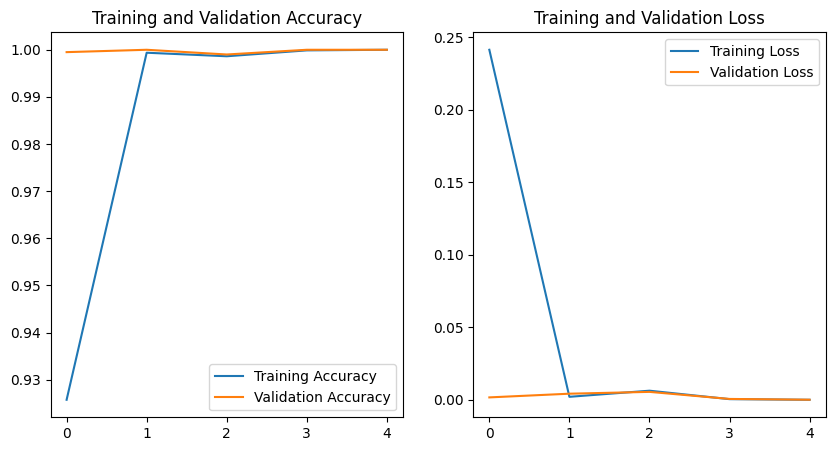

In [2]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt


device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
  print("\n\n*** WARNING: GPU NOT FOUND ***\nGo to '...' -> Accelerator -> Select 'GPU (T4 x2)'\n")
else:
  print(f'Found GPU at: {device_name}')


data_dir = '/kaggle/working/leapgestrecog_processed' 
batch_size = 32
img_height = 96   
img_width = 96    
num_epochs = 5    


print("Loading training data (80% of images)...")
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,   
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale') 
print("Loading validation data (20% of images)...")
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale')


class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Found {num_classes} classes: {class_names}")


AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


model = Sequential([
  
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  
 
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  
  layers.MaxPooling2D(),
  
 
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  
  
  
  layers.Flatten(),
  
  
  layers.Dense(128, activation='relu'),
  
  
  layers.Dense(num_classes, activation='softmax')
])


print("Compiling model...")
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


print("\nStarting model training...")
history = model.fit(
  train_ds,              
  validation_data=val_ds, 
  epochs=num_epochs       
)
print("Training finished.")


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']  
loss = history.history['loss']
val_loss = history.history['val_loss']    
epochs_range = range(num_epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [6]:

model.save('hand_gesture_model.h5')

print("Model saved successfully as 'hand_gesture_model.h5'")

Model saved successfully as 'hand_gesture_model.h5'
